Testing new figures
-------------------

In [1]:
# This sets plots to display in-line by default
%matplotlib inline
# Import module, for high-level functions, no additional modules are needed
import rnavigate as MaP
import matplotlib.pyplot as plt
import numpy as np

# Creates an HTML button that hides/shows code cells
# Useful for lab notebook reports and research updates
# NOTE: this does not display well on GitHub.
MaP.create_code_button()

In [2]:
rnp_sample = MaP.Sample(sample="rnp_example",
                        rnp="data/RMRP-RNPMaP-Example_RESULTS.csv",
                        profile="data/example1_rnasep_profile.txt",
                        rings="data/example1-rnasep.corrs",
                        ss="data/hs-RMRP.nsd")


c:\Users\psirving\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


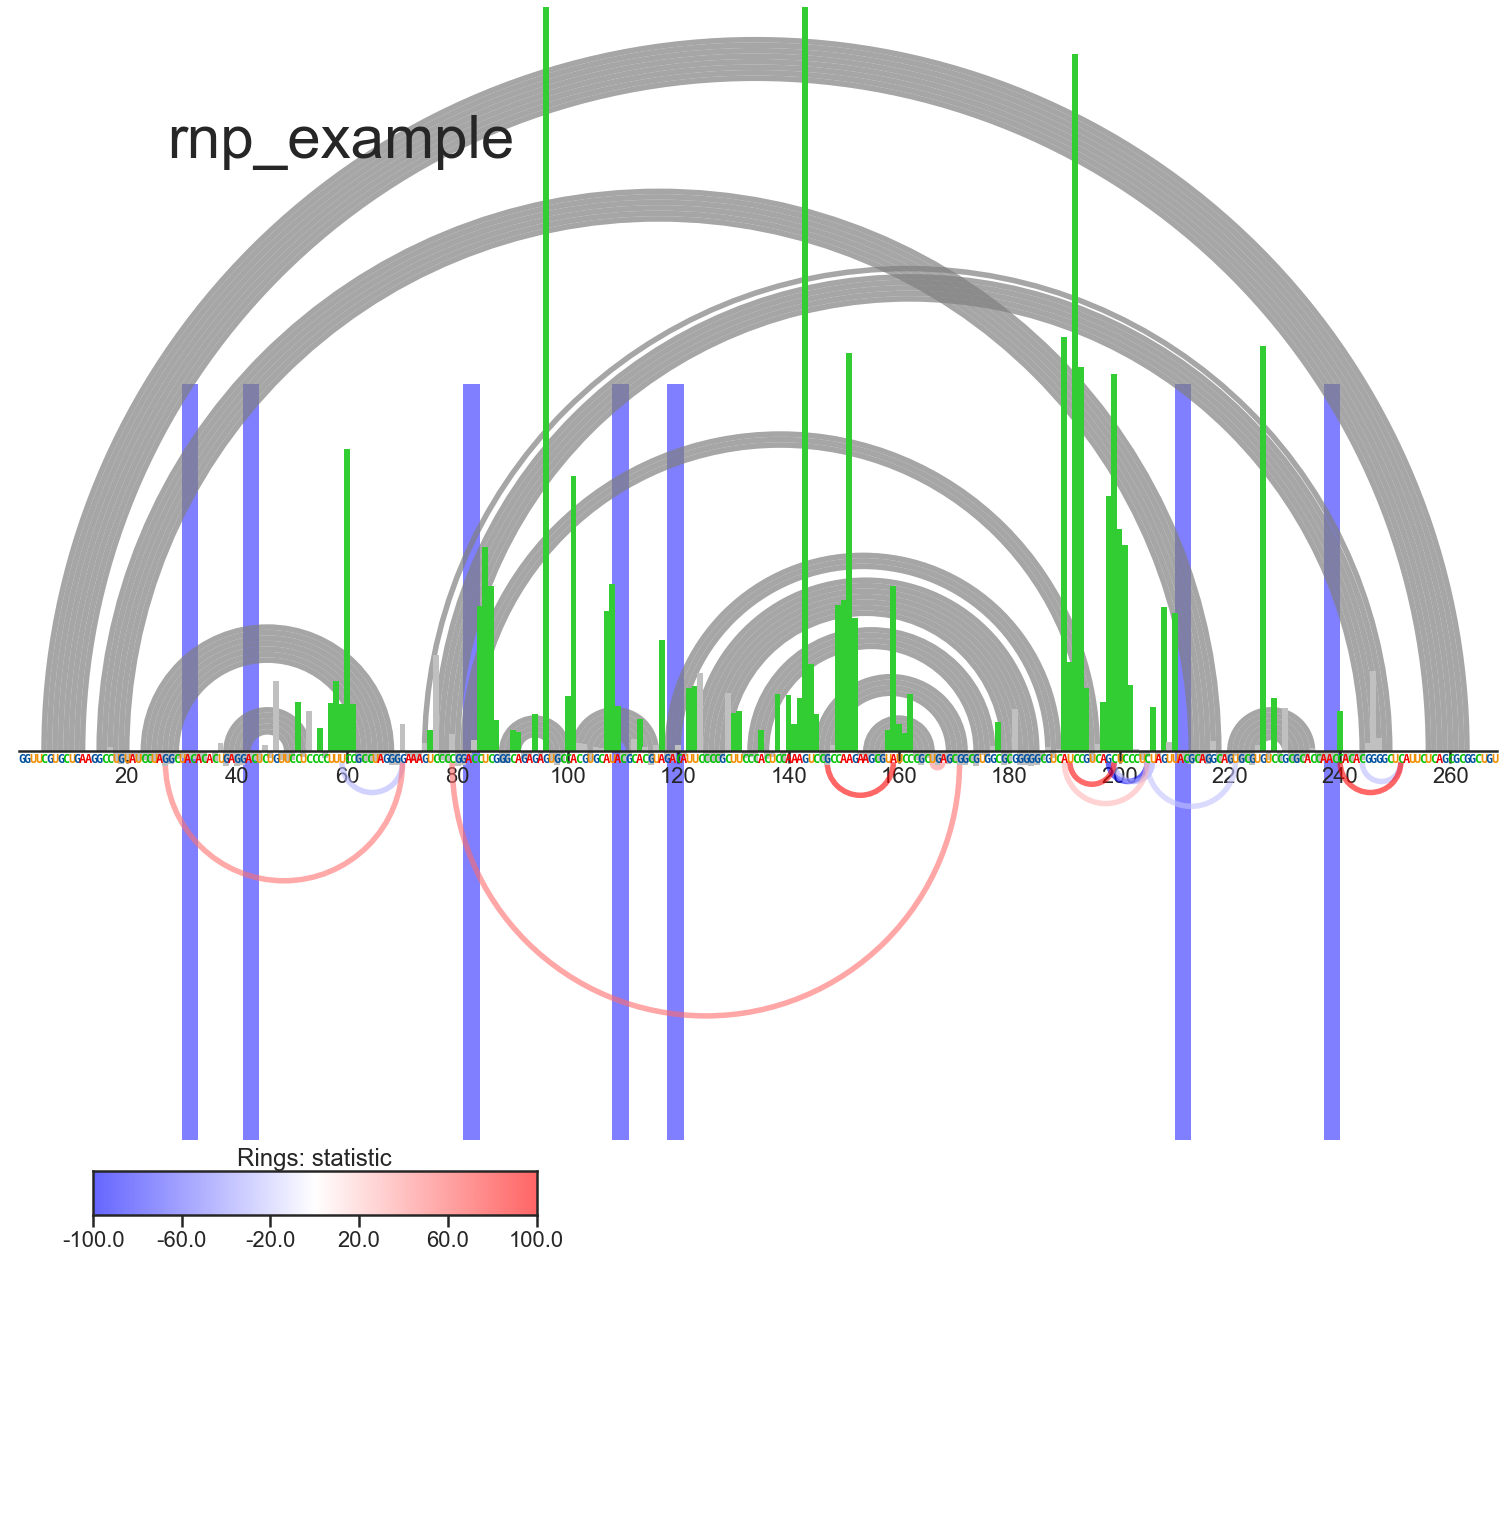

In [3]:

ss = rnp_sample.make_ap(ct="ss", profile="rnp", ij="rings")
annotation = MaP.Annotation(name="UAC", motif="DAC", color="blue",
                            sequence=rnp_sample.data["ss"].sequence)
xvals = np.array(rnp_sample.data["ss"].num)/rnp_sample.data["ss"].length
yvals = np.array([int(site) for site in annotation.sites])/2
bottoms = np.full(len(yvals), 0.25)
ss.axes[0,0].bar(xvals, yvals, 1/rnp_sample.data["ss"].length, linewidth=0,
                 alpha=0.5, color=annotation.color, zorder=-5, bottom=0.25,
                 transform=ss.axes[0, 0].transAxes);
#rnp_sample.make_ap(ct="ss", profile="rnp", ij="rings", annotation="DAC")

motif=AUC is not a valid filter.


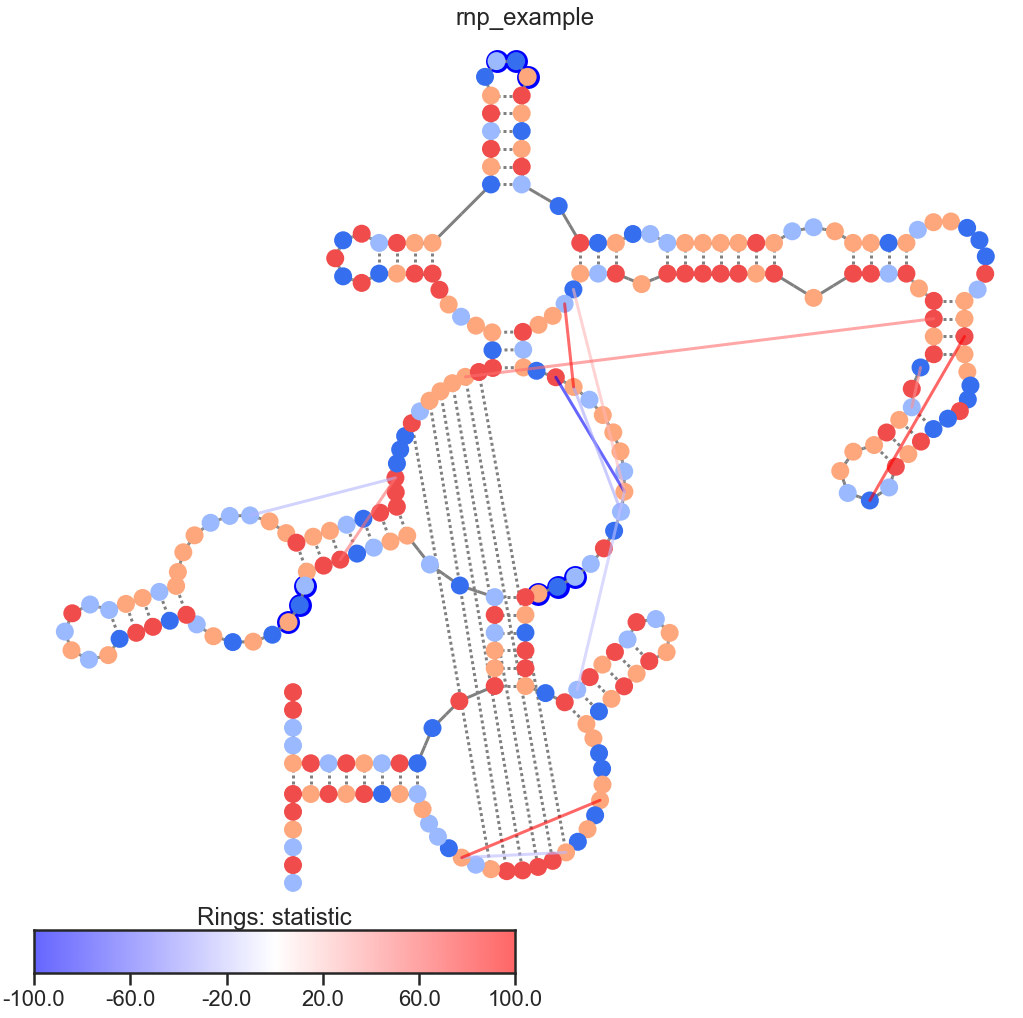

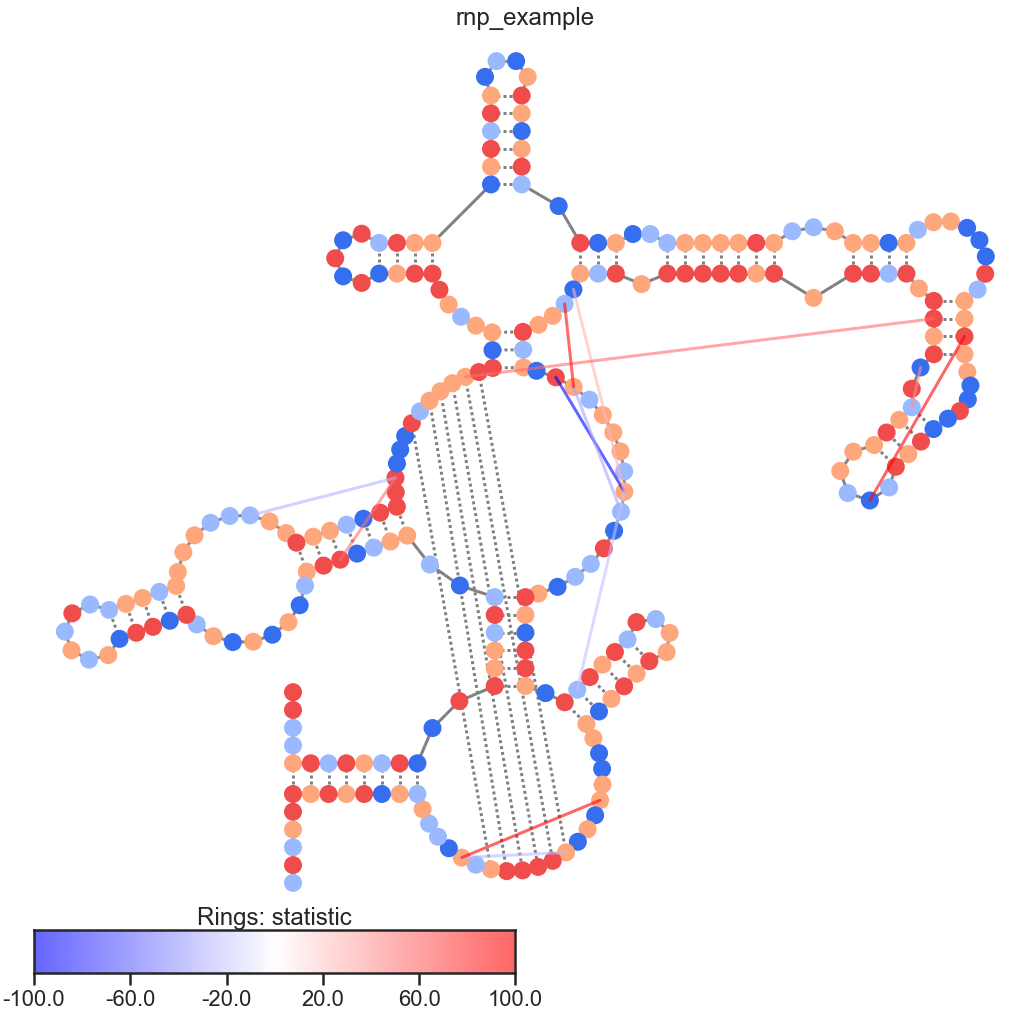

In [4]:
ss = rnp_sample.make_ss(profile="rnp", ij="rings")
annotation = MaP.Annotation(name="TAC", motif="UAC", color="blue",
                            sequence=rnp_sample.data["ss"].sequence)
xvals = rnp_sample.data["ss"].xcoordinates[annotation.sites]
yvals = rnp_sample.data["ss"].ycoordinates[annotation.sites]
ss.axes[0, 0].scatter(xvals, yvals, s=525, linewidth=0, color=annotation.color, zorder=-5)
rnp_sample.make_ss(profile="rnp", ij="rings", motif="AUC")

In [5]:
path = 'data/'
def kwargs(sample):
    kwargs = {"sample": sample,
              "profile": path+sample+"_rnasep_profile.txt",
              "ct": path+"RNaseP.ct",
              "ss": path+"RC_CRYSTAL_STRUCTURE.xrna",
              "rings": path+sample+"-rnasep.corrs",
              "pairs": path+sample+"-rnasep-pairmap.txt",
              "log": path+sample+"_shapemapper_log.txt",
              "dance_prefix": path+sample+"_rnasep",
              "deletions": path+"example-rnasep-deletions.txt",
              "fasta": path+"RNaseP-noSC.fasta",
              "pdb": path+"3dhs_Correct.pdb",
              "pdb_kwargs":{"chain": "A"}}
    return kwargs

example1 = MaP.Sample(**kwargs("example1"))
example2 = MaP.Sample(**kwargs("example2"))
example3 = MaP.Sample(**kwargs("example3"))
example4 = MaP.Sample(**kwargs("example4"))
samples = [example1, example2, example3, example4]

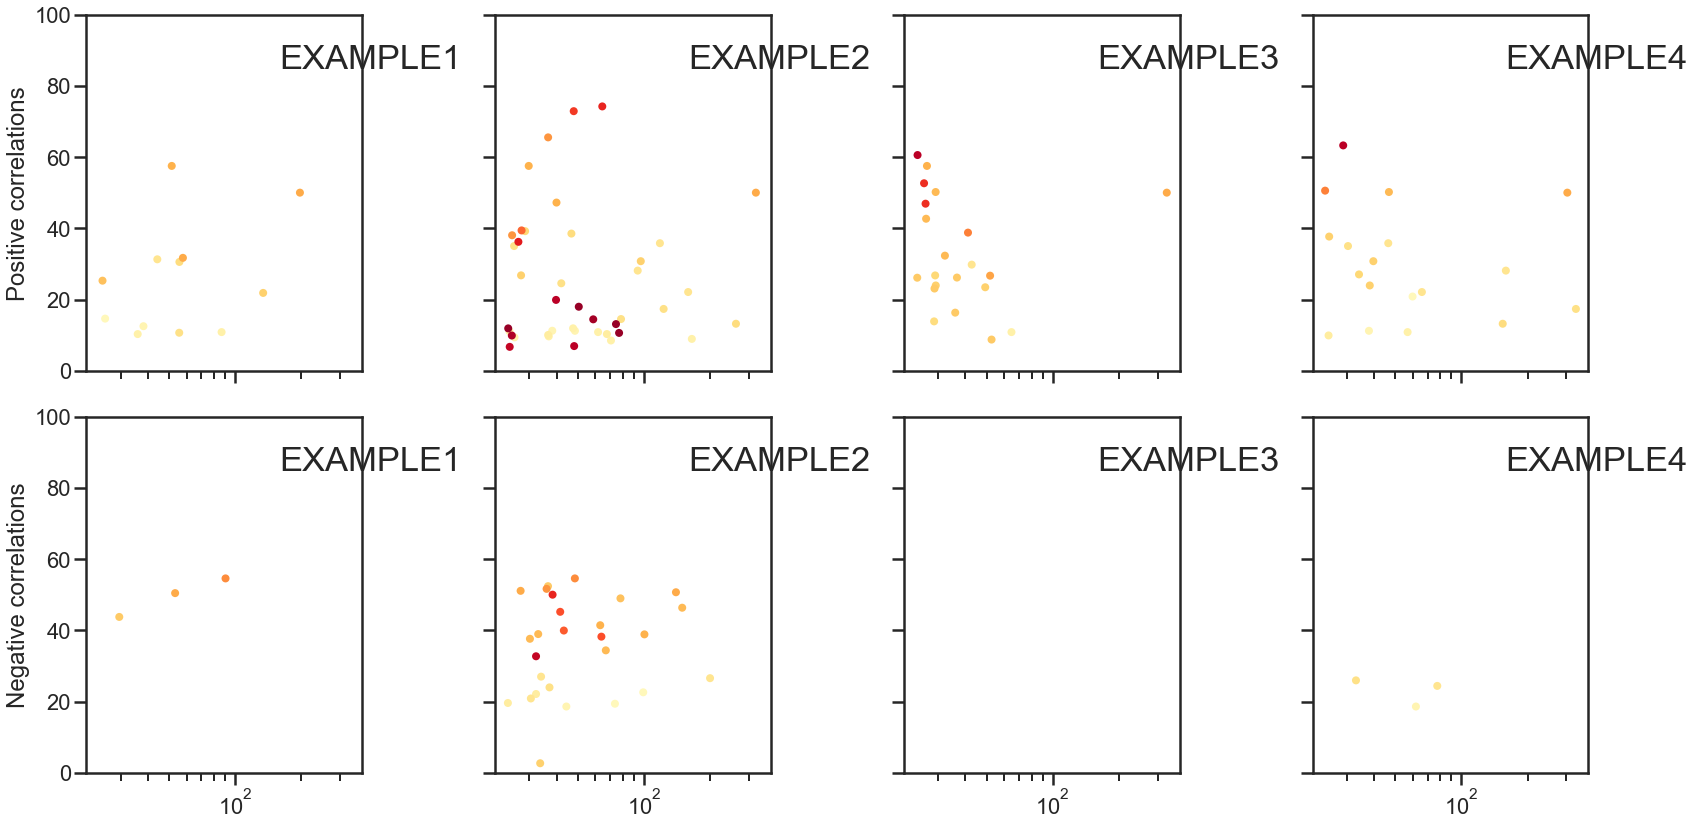

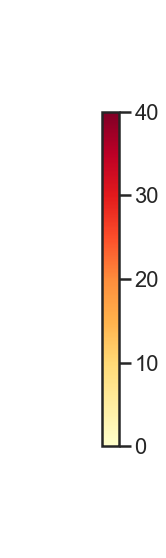

In [6]:
fig, ax = plt.subplots(2, 4, figsize=(24, 12), sharey=True, sharex=True)
for i, sample in enumerate(samples):
    sample.data["rings"].set_3d_distances(sample.data["pdb"], "O2'")
    data = sample.data["rings"].data
    data["cd"] = [sample.data["ct"].contactDistance(
        i+1, j+1) for _, i, j in data[["i", "j"]].itertuples()]
    data.sort_values(by=["cd"], inplace=True)
    mask = data["Sign"] == 1
    im = ax[0, i].scatter(data.loc[mask, "Statistic"], data.loc[mask, "Distance"],
                          c=data.loc[mask, "cd"], cmap="YlOrRd", marker='.', vmin=0, vmax=40)
    ax[0, i].annotate(sample.sample[:].upper(), (0.7, 0.85),
                      xycoords="axes fraction", fontsize="x-large")
    ax[1, i].annotate(sample.sample[:].upper(), (0.7, 0.85),
                      xycoords="axes fraction", fontsize="x-large")
    ax[1, i].scatter(data.loc[~mask, "Statistic"], data.loc[~mask, "Distance"],
                     c=data.loc[~mask, "cd"], cmap="YlOrRd", marker='.', vmin=0, vmax=40)
ax[0, 0].set(xscale="log", ylim=[0,100])
ax[0, 0].set_ylabel("Positive correlations")
ax[1, 0].set_ylabel("Negative correlations")
plt.tight_layout()

fig, ax = plt.subplots(1, figsize=(2, 10))
fig.colorbar(im, ax=ax)
ax.set_axis_off()
